In [34]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

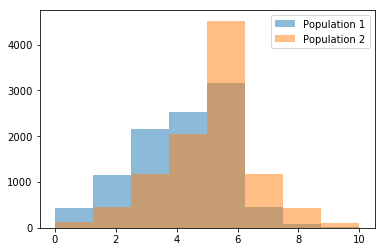

In [47]:
pop1 = np.random.binomial( 10, 0.4, 10000 )
pop2 = np.random.binomial( 10, 0.5, 10000 ) 

# Let’s make histograms for the two groups. 

plt.hist( pop1, alpha = 0.5, bins = 8, label = 'Population 1' )
plt.hist( pop2, alpha = 0.5, bins = 8, label = 'Population 2' ) 
plt.legend( loc = 'upper right' )
plt.show()

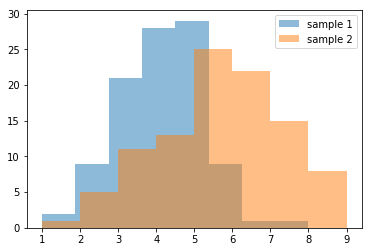

In [48]:
sample1 = np.random.choice( pop1, 100, replace = True )
sample2 = np.random.choice( pop2, 100, replace = True )

plt.hist( sample1, alpha = 0.5, bins = 8, label = 'sample 1' )
plt.hist( sample2, alpha = 0.5, bins = 8, label = 'sample 2' )
plt.legend( loc = 'upper right' ) 
plt.show()

In [49]:
print( sample1.mean() )
print( sample2.mean() )
print( sample1.std() )
print( sample2.std() )

# Compute the difference between the two sample means.
diff = sample2.mean() - sample1.mean()
print( diff )

4.09
5.23
1.28136645812
1.65441832678
1.14


In [50]:
size = np.array( [ len( sample1 ), len( sample2 ) ] )
sd   = np.array( [ sample1.std(),  sample2.std()  ] )

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = sum( sd ** 2 / size ) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print( diff / diff_se )

5.44775262634


In [51]:
from scipy.stats import ttest_ind
print( ttest_ind( sample2, sample1, equal_var = False ) )

Ttest_indResult(statistic=5.4204454236716142, pvalue=1.8245451809217841e-07)


In [33]:
# Question 1:
# OK, initially, with both sample sizes equal to 100, I got a t-statistic of 17.347 (and change).  My anticipation is
# that larger sample sizes will increase the size of the t-stat, and smaller samples will decrease the size.  This is
# because the standard error is the square root of the sum of two fractions, and the denominators of the two fractions
# are the two sample sizes.  Larger samples decrease the fractions and smaller samples increase the fractions.  The
# square root in the standard error is an increasing function;  that is, the smaller the quantity under the radical,
# the smaller the radical.  The statement had by replacing the word "smaller" with "larger" in that last sentence is
# also true.  All other quantities held constant, the fraction diff / diff_se decreases when diff_se increases, and it
# increases when diff_se decreases.  So, here's what I saw:
#   when sample sizes were   20, diff / diff_se was:   4.246 (and change)
#   when sample sizes were  100, diff / diff_se was:  14.164 (and change)
#   when sample sizes were 1000, diff / diff_se was:  43.866 (and change)
# I LOVE IT when things work out the way they're supposed to.

In [52]:
# Question 2:
# Now we're leaving the standard error alone by fixing the sample sizes (both at n = 100, I presume), but we're
# monkeying around with the relative locations of the two distributions by making adjustments to the means.  Recall
# (from my last assignment submission) that a binomial distribution with parameters n and p has a mean of np.  In both
# populations, the parameter n remains 10.  Changing p from 0.2 to 0.3 in the first group moves the mean of pop1 up,
# from 2 to 3 -- closer to the pop2 mean of 5.  One would then anticipate diff to shrink, and so our t-statistic will
# grow smaller.  A smaller test statistic produces here a larger p-value in the t-test.
# 
# Here are the results:
# pop1 p = 0.2;    test stat t:  14.5537378894     p-value:  7.769596365889359e-32
# pop1 p = 0.3;    test stat t:   8.88982254667    p-value:  5.1484191947954709e-16
# pop1 p = 0.4;    test stat t:   5.44775262634    p-value:  1.8245451809217841e-07
# I STILL LOVE IT when things work out the way they're supposed to.

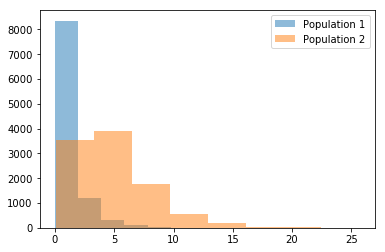

In [64]:
pop1 = np.random.chisquare( 1, 10000 )
pop2 = np.random.chisquare( 5, 10000 ) 

# Let’s make histograms for the two groups. 

plt.hist( pop1, alpha = 0.5, bins = 8, label = 'Population 1' )
plt.hist( pop2, alpha = 0.5, bins = 8, label = 'Population 2' ) 
plt.legend( loc = 'upper right' )
plt.show()

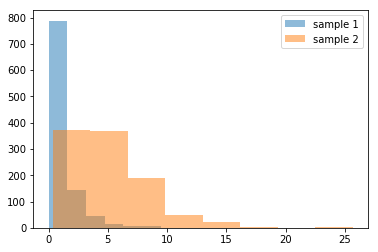

In [65]:
sample1 = np.random.choice( pop1, 1000, replace = True )
sample2 = np.random.choice( pop2, 1000, replace = True )

plt.hist( sample1, alpha = 0.5, bins = 8, label = 'sample 1' )
plt.hist( sample2, alpha = 0.5, bins = 8, label = 'sample 2' )
plt.legend( loc = 'upper right' ) 
plt.show()

In [66]:
print( sample1.mean() )
print( sample2.mean() )
print( sample1.std() )
print( sample2.std() )

# Compute the difference between the two sample means.
diff = sample2.mean() - sample1.mean()
print( diff )

1.00345689459
5.04907901424
1.40404084912
3.16667306412
4.04562211965


In [67]:
size = np.array( [ len( sample1 ), len( sample2 ) ] )
sd   = np.array( [ sample1.std(),  sample2.std()  ] )

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = sum( sd ** 2 / size ) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print( diff / diff_se )

36.9326178253


In [68]:
from scipy.stats import ttest_ind
print( ttest_ind( sample2, sample1, equal_var = False ) )

Ttest_indResult(statistic=36.914146897505951, pvalue=6.0172412649240135e-208)


In [69]:
# Question 3:
# OK, sweet -- let's hoist a cheer for the central limit theorem by showing how it all works out even when we start
# with some screwball asymmetric skewed distributions.  How about Chi-square?  One with df = 1, the other with df = 5.
# Recall that df gives the mean of the chi-square distributions.  The delicious CLT preaches the gospel that even in
# the presence of extreme skewness, our sample differences will be approximately normal.  So, our t-statistic will
# follow Mr. Gosset's (i.e., Student's) t-distribution, and we can coax a p-value out of that sucker.  Check it out!
#   t = diff / diff_se:  11.5069230557    p-value:  5.3411030799966466e-22
# For giggles we up the df in pop1 from 1 to 3.  I think it will shrink diff, meaning our t-stat is reduced, and so
# our t-test p-value gets bigger.  Let's look:
#   t = diff / diff_se:   5.59967039882   p-value:  8.7164011727990102e-08
# That's a stone cold groove, baby.  OK, go back to pop1 df = 1, but this time we'll up the sample size from 100 to
# 1000.  How will that effect the procedings?  Same way it did in question #1 -- by making the denominators in the two
# fractions in diff_se bigger, and therefore making diff_se smaller.  So that makes the test statistic
# t = diff / diff_se bigger and also makes the p-value of the test so freaking small, a high-powered electron
# microscope will be needed to see it.  LET'S WATCH!
#   t = diff / diff_se:  36.9326178253    p-value:  6.0172412649240135e-208
# Sweet Jesus on roller skates.  All hail to the mighty CLT!